# Zeeshan Ali (01-134212-197)
# Task 1
## Read an image of your choice. Apply average and gaussian filters of size 5x5 individually and identify the differences b/w their results.

(-0.5, 727.5, 454.5, -0.5)

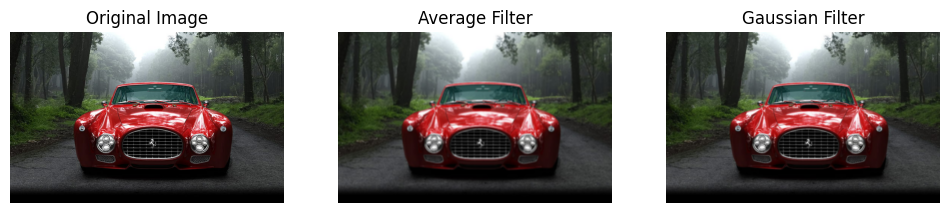

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('background.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

average_filter = cv2.blur(img, (5, 5))

gaussian_filter = cv2.GaussianBlur(img, (5, 5), 0)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(average_filter)
plt.title('Average Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_filter)
plt.title('Gaussian Filter')
plt.axis('off')

# Task 2
## Read an image of your choice which has salt and pepper noise. Apply rank filter of size 5x5 using rank = 13. What is the other name of this filtering? If you use rank = 1 or 25, will the noise increase or decrease?

(-0.5, 255.5, 255.5, -0.5)

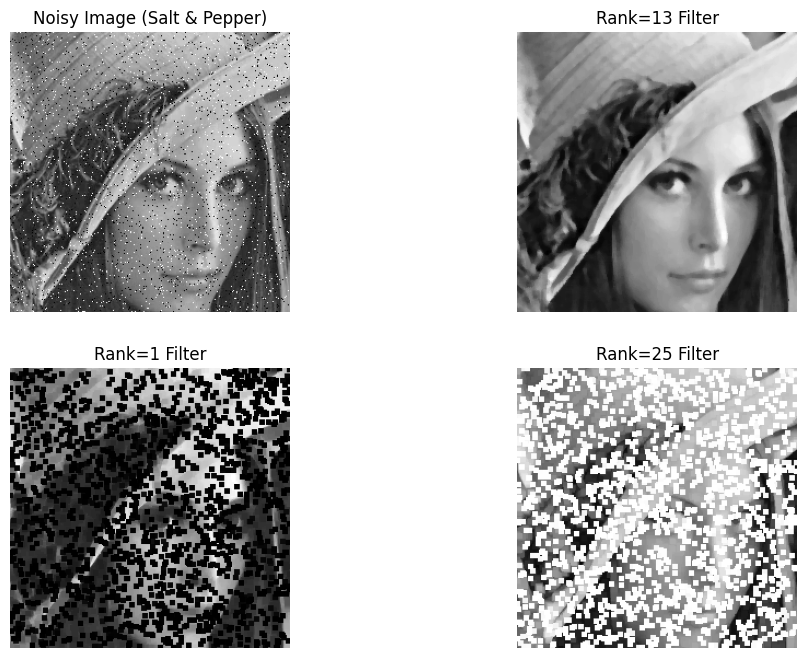

In [2]:
img = cv2.imread('salt.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

filtered_img_rank13 = cv2.medianBlur(img, 5)

filtered_img_rank1 = cv2.erode(img, np.ones((5, 5), np.uint8))

filtered_img_rank25 = cv2.dilate(img, np.ones((5, 5), np.uint8))

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Noisy Image (Salt & Pepper)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(filtered_img_rank13, cmap='gray')
plt.title('Rank=13 Filter')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(filtered_img_rank1, cmap='gray')
plt.title('Rank=1 Filter')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(filtered_img_rank25, cmap='gray')
plt.title('Rank=25 Filter')
plt.axis('off')

# Other name for Rank Filter: Order-Statistic Filter.
## Rank = 13 (Median Filter): Best for removing salt and pepper noise while preserving edges.
## Rank = 1 (Minimum Filter): Removes pepper noise but may increase salt noise visibility.
## Rank = 25 (Maximum Filter): Removes salt noise but may increase pepper noise visibility.

# Task 3
## Read the image. Write a function named ‘mylaplacian’ to MANUALLY code/implement 2nd order derivate of above read image in order to extract horizontal and vertical edges, collectively. Also, compare your results with ‘Sobel’ filter and state your findings.

<ipython-input-3-8cafca5017b2>:12: RuntimeWarning: overflow encountered in scalar add
  horizontal_edges[x, y] = img[x, y + 1] + img[x, y - 1] - 2 * img[x, y]
<ipython-input-3-8cafca5017b2>:11: RuntimeWarning: overflow encountered in scalar add
  vertical_edges[x, y] = img[x + 1, y] + img[x - 1, y] - 2 * img[x, y]


(-0.5, 1237.5, 1237.5, -0.5)

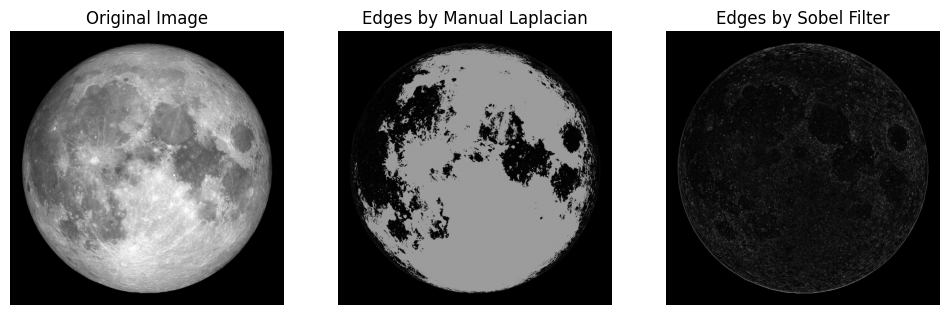

In [3]:
img = cv2.imread('moon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def mylaplacian(img):
    horizontal_edges = np.zeros_like(img, dtype=np.float32)
    vertical_edges = np.zeros_like(img, dtype=np.float32)
    rows, cols = img.shape
    
    for x in range(1, rows - 1):
        for y in range(1, cols - 1):
            vertical_edges[x, y] = img[x + 1, y] + img[x - 1, y] - 2 * img[x, y]
            horizontal_edges[x, y] = img[x, y + 1] + img[x, y - 1] - 2 * img[x, y]

    combined_edges = np.abs(horizontal_edges) + np.abs(vertical_edges)
    return combined_edges

manual_edges = mylaplacian(img)

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobelx, sobely)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(manual_edges, cmap='gray')
plt.title('Edges by Manual Laplacian')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Edges by Sobel Filter')
plt.axis('off')